In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import statsmodels.api as sm
from statsmodels.formula.api import ols, mixedlm
import numpy as np  
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm
import pmdarima as pm
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
path = 'C:/Users/Tim/Documents/DSC680/Project 1/Data/'

In [4]:
file1 = pd.read_csv(path+'Retail 2009-10.csv')

In [5]:
file2 = pd.read_csv(path+'Retail 2010-11.csv')

In [6]:
file1.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [17]:
file2.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [18]:
file1['Description'].unique

<bound method Series.unique of 0         15CM CHRISTMAS GLASS BALL 20 LIGHTS
1                          PINK CHERRY LIGHTS
2                         WHITE CHERRY LIGHTS
3                RECORD FRAME 7" SINGLE SIZE 
4              STRAWBERRY CERAMIC TRINKET BOX
                         ...                 
525456                   FELTCRAFT DOLL ROSIE
525457           FELTCRAFT PRINCESS LOLA DOLL
525458         FELTCRAFT PRINCESS OLIVIA DOLL
525459     PINK FLORAL FELTCRAFT SHOULDER BAG
525460                 JUMBO STORAGE BAG SUKI
Name: Description, Length: 525461, dtype: object>

In [19]:
file1.shape

(525461, 8)

In [20]:
file2.shape

(541910, 8)

In [21]:
file1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [22]:
len(file1['Customer ID'].unique())

4384

In [23]:
#Cleaning

file1[file1['Customer ID'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,01-12-2009 10:52,0.00,NaN,United Kingdom
283,489463,71477,short,-240,01-12-2009 10:52,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,01-12-2009 10:53,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,01-12-2009 11:44,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,01-12-2009 11:49,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,09-12-2010 17:17,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,09-12-2010 17:17,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,09-12-2010 17:18,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,09-12-2010 17:25,0.00,NaN,United Kingdom


In [24]:
file1[file1['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,01-12-2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,01-12-2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,01-12-2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,01-12-2009 10:33,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,01-12-2009 10:33,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,09-12-2010 17:17,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,09-12-2010 17:17,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,09-12-2010 17:25,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,09-12-2010 17:25,0.00,NaN,United Kingdom


In [25]:
#Handling null descriptions

In [7]:
df_description = file1[file1['Description'].isnull()]

In [8]:
df_description[df_description['Quantity']> 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3161,489659,21350,NaN,230,01-12-2009 17:39,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,02-12-2009 11:45,0.0,NaN,United Kingdom
6378,489882,35751C,NaN,12,02-12-2009 16:22,0.0,NaN,United Kingdom
6555,489898,79323G,NaN,954,03-12-2009 09:40,0.0,NaN,United Kingdom
6581,489903,21166,NaN,48,03-12-2009 09:57,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524728,538142,84247C,NaN,1,09-12-2010 15:58,0.0,NaN,United Kingdom
524729,538144,90042B,NaN,1,09-12-2010 15:58,0.0,NaN,United Kingdom
524730,538141,22218,NaN,2,09-12-2010 15:58,0.0,NaN,United Kingdom
524731,538143,84534B,NaN,1,09-12-2010 15:58,0.0,NaN,United Kingdom


In [28]:
df_description[df_description['Price']> 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [29]:
df_description[df_description['Customer ID'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,01-12-2009 11:44,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,01-12-2009 17:26,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,01-12-2009 17:39,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,02-12-2009 11:45,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,02-12-2009 12:42,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524730,538141,22218,NaN,2,09-12-2010 15:58,0.0,NaN,United Kingdom
524731,538143,84534B,NaN,1,09-12-2010 15:58,0.0,NaN,United Kingdom
525231,538159,21324,NaN,-18,09-12-2010 17:17,0.0,NaN,United Kingdom
525232,538158,20892,NaN,-32,09-12-2010 17:17,0.0,NaN,United Kingdom


In [30]:
df_description[df_description['Customer ID'].notnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [31]:
#Null and negative prices

In [32]:
file1[file1['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,29-04-2010 13:36,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,19-07-2010 11:24,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,20-10-2010 12:04,-38925.87,NaN,United Kingdom


In [33]:
file1[file1['Price'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [34]:
#Negative and null quantities

In [35]:
file1[file1['Quantity'] <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,01-12-2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,01-12-2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,01-12-2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,01-12-2009 10:33,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,01-12-2009 10:33,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,09-12-2010 17:17,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,09-12-2010 17:17,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,09-12-2010 17:25,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,09-12-2010 17:25,0.00,NaN,United Kingdom


In [36]:
#We know that a negative price would be a "return" so let's check 0 and NaN AND quantity <0]

In [37]:
file1[file1['Quantity'] <= 0].sort_values(by = 'Price')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
221009,510853,90203,NaN,-33,04-06-2010 09:36,0.00,NaN,United Kingdom
101061,498932,82081,NaN,-4,24-02-2010 10:24,0.00,NaN,United Kingdom
101075,498930,72754A,damaged,-62,24-02-2010 10:24,0.00,NaN,United Kingdom
101076,498933,84396,NaN,-51,24-02-2010 10:28,0.00,NaN,United Kingdom
350796,523519,84845C,NaN,-1,22-09-2010 13:03,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
519170,C537644,AMAZONFEE,AMAZON FEE,-1,07-12-2010 15:34,13474.79,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,07-12-2010 15:04,13541.33,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,07-12-2010 15:49,13541.33,NaN,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,27-08-2010 13:42,18910.69,NaN,United Kingdom


In [38]:
file1[file1['Invoice'] == 'C489449']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,01-12-2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,01-12-2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,01-12-2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,01-12-2009 10:33,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,01-12-2009 10:33,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,01-12-2009 10:33,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,01-12-2009 10:33,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,01-12-2009 10:33,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,01-12-2009 10:33,2.95,16321.0,Australia


In [39]:
file1[file1['Customer ID'] == 16321.0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,01-12-2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,01-12-2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,01-12-2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,01-12-2009 10:33,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,01-12-2009 10:33,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,01-12-2009 10:33,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,01-12-2009 10:33,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,01-12-2009 10:33,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,01-12-2009 10:33,2.95,16321.0,Australia
187,489450,22087,PAPER BUNTING WHITE LACE,12,01-12-2009 10:36,2.95,16321.0,Australia


In [67]:
junk = file1[file1['Description'].str.contains(r'[a-z]') == True]

In [68]:
junk['Description'].unique()

array(['85123a mixed', 'short', '21733 mixed', 'BAG 500g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 40x40cm', 'POLYESTER FILLER PAD 60x40cm',
       'Discount', '*USB Office Glitter Lamp', 'BAG 250g SWIRLY MARBLES',
       'Hypochondriac Pill Stress Ball', 'Manual',
       'POLYESTER FILLER PAD 65CMx65CM', 'POLYESTER FILLER PAD 45x45cm',
       'lost', 'damages', 'BAG 125g SWIRLY MARBLES', 'invcd as 84879?',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'FOLK ART GREETING CARD,pack/12', '*USB Office Mirror Ball',
       "Dad's Cab Electronic Meter", 'sold as gold',
       'POLYESTER FILLER PAD 30CMx30CM', 'lost?', 'damaged', 'wet',
       ' Bank Charges', "Dr. Jam's Arouzer Stress Ball",
       'This is a test product.', 'smashed',
       'Electronic Talking Breath-A-Loser',
       'Dotcomgiftshop Gift Voucher £80.00',
       'Dotcomgiftshop Gift Voucher £20.00', 'bad quality',
       'Dotcomgiftshop Gift Voucher £10.00',
       'Glow In The Dark Shot Glasses ',
       'Dotco

In [74]:
junk[junk['Description'] == "Adjustment by john on 26/01/2010 17"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
71058,495776,ADJUST,Adjustment by john on 26/01/2010 17,1,26-01-2010 17:03,49.35,17940.0,United Kingdom
71059,495777,ADJUST,Adjustment by john on 26/01/2010 17,1,26-01-2010 17:05,179.45,14156.0,EIRE
71061,495780,ADJUST,Adjustment by john on 26/01/2010 17,1,26-01-2010 17:08,16.33,17867.0,United Kingdom
71064,495782,ADJUST,Adjustment by john on 26/01/2010 17,1,26-01-2010 17:10,139.71,14156.0,EIRE
71065,495783,ADJUST,Adjustment by john on 26/01/2010 17,1,26-01-2010 17:11,48.96,14380.0,United Kingdom
71066,495784,ADJUST,Adjustment by john on 26/01/2010 17,1,26-01-2010 17:11,11.31,14156.0,EIRE
71068,495788,ADJUST,Adjustment by john on 26/01/2010 17,1,26-01-2010 17:16,11.90,14156.0,EIRE
71071,495791,ADJUST,Adjustment by john on 26/01/2010 17,1,26-01-2010 17:19,243.63,14079.0,United Kingdom
71072,495792,ADJUST,Adjustment by john on 26/01/2010 17,1,26-01-2010 17:20,114.89,17672.0,United Kingdom
71074,495794,ADJUST,Adjustment by john on 26/01/2010 17,1,26-01-2010 17:22,41.09,12471.0,Germany


In [71]:
junk = junk.dropna()

In [72]:
junk = junk[junk['Quantity'] > 0]

In [73]:
junk['Description'].unique()

array(['BAG 500g SWIRLY MARBLES', 'POLYESTER FILLER PAD 40x40cm',
       'POLYESTER FILLER PAD 60x40cm', 'POLYESTER FILLER PAD 65CMx65CM',
       'POLYESTER FILLER PAD 45x45cm', 'BAG 125g SWIRLY MARBLES',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'FOLK ART GREETING CARD,pack/12', 'BAG 250g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 30CMx30CM', 'Manual', ' Bank Charges',
       'This is a test product.', 'Adjustment by john on 26/01/2010 16',
       'Adjustment by john on 26/01/2010 17',
       'POLYESTER FILLER PAD 45x30cm', 'Bank Charges', 'Discount',
       ' SET Of 6 SOLDIER SKITTLES', 'THE KING GIFT BAG 25x24x12cm',
       'Adjustment by Peter on Jun 25 2010 ',
       'FRENCH BLUE METAL DOOR SIGN, No',
       'NUMBER TILE COTTAGE GARDEN, No', 'NUMBER TILE VINTAGE FONT, No ',
       'NUMBER TILE VINTAGE FONT No ', 'FRENCH BLUE METAL DOOR SIGN No',
       'NUMBER TILE COTTAGE GARDEN No',
       '3 TRADITIONAl BISCUIT CUTTERS  SET'], dtype=object)

In [83]:
import re
find_str = 'PAPER BUNTING WHITE LACE'

len(re.findall(r'[A-Z]',find_str))

21

In [9]:
def filter_by_length(x):
    return len(re.findall(r'[A-Z]', x))

In [97]:
real = junk[junk['Description'].apply(filter_by_length) > 3]

In [98]:
real['Description'].unique()

array(['BAG 500g SWIRLY MARBLES', 'POLYESTER FILLER PAD 40x40cm',
       'POLYESTER FILLER PAD 60x40cm', 'POLYESTER FILLER PAD 65CMx65CM',
       'POLYESTER FILLER PAD 45x45cm', 'BAG 125g SWIRLY MARBLES',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'FOLK ART GREETING CARD,pack/12', 'BAG 250g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 30CMx30CM', 'POLYESTER FILLER PAD 45x30cm',
       ' SET Of 6 SOLDIER SKITTLES', 'THE KING GIFT BAG 25x24x12cm',
       'FRENCH BLUE METAL DOOR SIGN, No',
       'NUMBER TILE COTTAGE GARDEN, No', 'NUMBER TILE VINTAGE FONT, No ',
       'NUMBER TILE VINTAGE FONT No ', 'FRENCH BLUE METAL DOOR SIGN No',
       'NUMBER TILE COTTAGE GARDEN No',
       '3 TRADITIONAl BISCUIT CUTTERS  SET'], dtype=object)

In [10]:
df_cleaned = file1.dropna()

In [11]:
df_cleaned = df_cleaned[df_cleaned['Description'].apply(filter_by_length) > 3]

In [12]:
df_cleaned = df_cleaned[(df_cleaned['Price'] > 0)  | (df_cleaned['Quantity'] > 0)]

In [112]:
df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,09-12-2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,09-12-2010 20:01,3.75,17530.0,United Kingdom


In [121]:
df_cleaned['StockCode'].sort_values(ascending= True)

283415     10002
230440     10002
267327     10002
296711     10002
469460     10002
           ...  
366450      POST
88690       POST
393667      POST
377066    SP1002
377387    SP1002
Name: StockCode, Length: 416681, dtype: object

In [122]:
df_cleaned[df_cleaned['StockCode'] == 'POST']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,01-12-2009 09:28,18.00,12682.0,France
126,489444,POST,POSTAGE,1,01-12-2009 09:55,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,01-12-2009 10:10,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,01-12-2009 11:50,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,01-12-2009 12:18,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,09-12-2010 11:31,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,09-12-2010 11:39,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,09-12-2010 12:05,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,09-12-2010 12:17,18.00,12683.0,France


In [123]:
junk = file2[file2['Description'].str.contains(r'[a-z]') == True]

In [124]:
junk

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
482,536408,21705,BAG 500g SWIRLY MARBLES,12,01-12-2010 11:41,1.65,14307.0,United Kingdom
918,536500,46000M,POLYESTER FILLER PAD 45x45cm,10,01-12-2010 12:35,1.55,17377.0,United Kingdom
1962,536544,21703,BAG 125g SWIRLY MARBLES,1,01-12-2010 14:32,0.85,NaN,United Kingdom
1963,536544,21704,BAG 250g SWIRLY MARBLES,1,01-12-2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
540654,581492,21704,BAG 250g SWIRLY MARBLES,1,09-12-2011 10:03,1.63,NaN,United Kingdom
541054,581492,22965,3 TRADITIONAl BISCUIT CUTTERS SET,1,09-12-2011 10:03,4.13,NaN,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541612,581514,21705,BAG 500g SWIRLY MARBLES,84,09-12-2011 11:20,0.39,17754.0,United Kingdom


In [13]:
def clean_df(df):
    df = df.dropna()
    clean_df= df[df['Description'].apply(filter_by_length) > 3]
    clean_df = clean_df[(clean_df['Price'] > 0)  | (clean_df['Quantity'] > 0)]
    return clean_df
    
    

In [14]:
df2 = clean_df(file2)

In [15]:
df1 = clean_df(file1)

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416681 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      416681 non-null  object 
 1   StockCode    416681 non-null  object 
 2   Description  416681 non-null  object 
 3   Quantity     416681 non-null  int64  
 4   InvoiceDate  416681 non-null  object 
 5   Price        416681 non-null  float64
 6   Customer ID  416681 non-null  float64
 7   Country      416681 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 28.6+ MB


In [17]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'],format='%d-%m-%Y %H:%M')

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


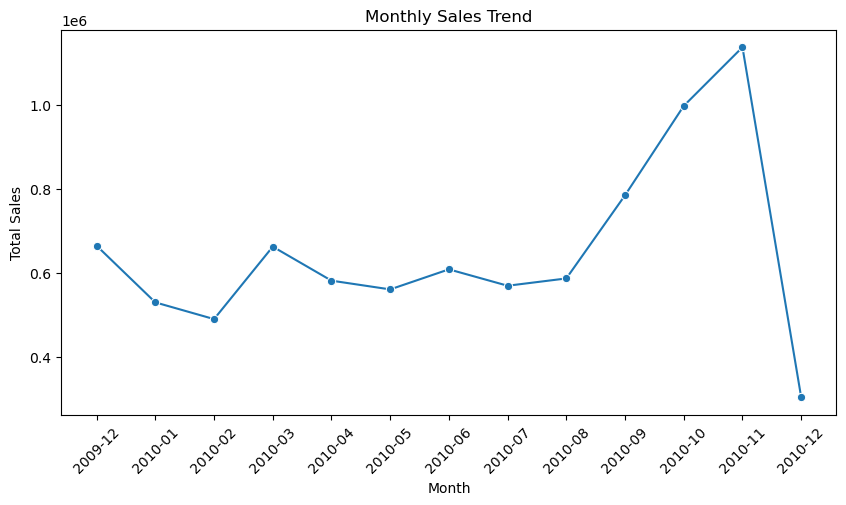

In [ ]:
# Change date to allow for monthly analysis
df1["YearMonth"] = df1["InvoiceDate"].dt.to_period("M")

# Compute total sales per month
df1["Sales"] = df1["Quantity"] * df1["Price"]
monthly_sales = df1.groupby("YearMonth")["Sales"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales["YearMonth"].astype(str), y=monthly_sales["Sales"], marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


In [ ]:
def graph_yearly(x_df):
    x_df["InvoiceDate"] = pd.to_datetime(x_df["InvoiceDate"], format="%d-%m-%Y %H:%M")

    # Change date to allow for monthly analysis
    x_df["YearMonth"] = x_df["InvoiceDate"].dt.to_period("M")

    # Calculate monthly sales
    x_df["Sales"] = x_df["Quantity"] * x_df["Price"]
    monthly_sales = x_df.groupby("YearMonth")["Sales"].sum().reset_index()

    # Plot line graph
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=monthly_sales["YearMonth"].astype(str), y=monthly_sales["Sales"], marker="o")
    plt.xticks(rotation=45)
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.title("Monthly Sales Trend")
    return plt.show()

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


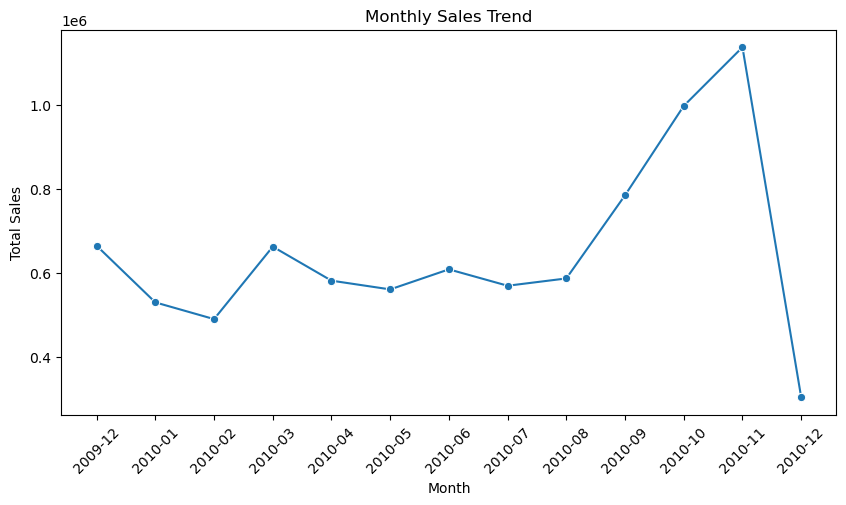

In [26]:
graph_yearly(df1)

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


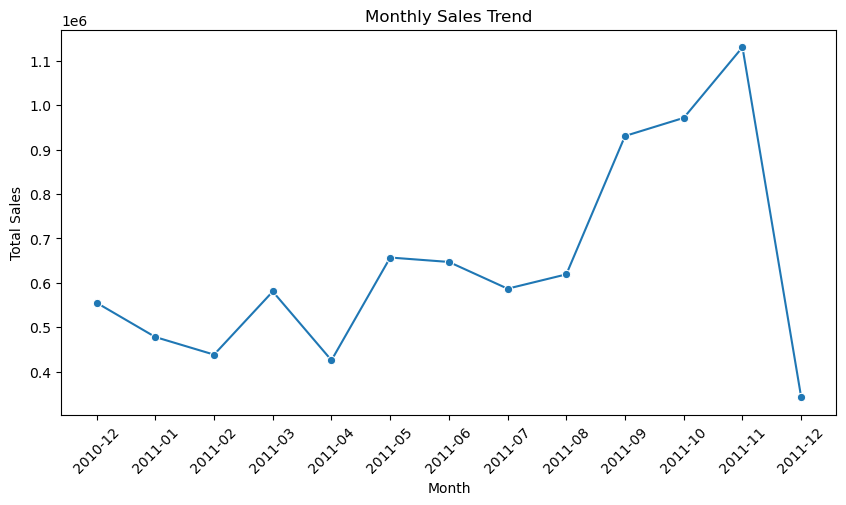

In [37]:
graph_yearly(df2)

In [ ]:
def get_top_sellers(x_df):

    x_df['InvoiceDate'] = pd.to_datetime(x_df['InvoiceDate'],format='%Y-%m-%D %H:%M')
    
    # Change date to allow for monthly analysis
    x_df["YearMonth"] = x_df["InvoiceDate"].dt.to_period("M")

    # Get total quantity sold per product for the whole year
    total_sales = x_df.groupby("Description")["Quantity"].sum().reset_index()

    # Get the top 5 selling products
    top_5_products = total_sales.nlargest(5, "Quantity")

    # Filter the dataset to include only top 5 products
    df_top_5 = x_df[x_df["Description"].isin(top_5_products["Description"])]

    # Group by YearMonth and Description to track monthly sales
    monthly_sales_top5 = df_top_5.groupby(["YearMonth", "Description"])["Quantity"].sum().reset_index()

    # Convert YearMonth to string for plotting
    monthly_sales_top5["YearMonth"] = monthly_sales_top5["YearMonth"].astype(str)
    return monthly_sales_top5


In [21]:
def plt_top5(grouped_df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grouped_df, x="YearMonth", y="Quantity", hue="Description", marker="o")

    # Labels and title
    plt.xticks(rotation=45)
    plt.xlabel("Month")
    plt.ylabel("Total Quantity Sold")
    plt.title("Monthly Sales Trends of Top 5 Products")
    plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc="upper left")


    return plt.show()

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


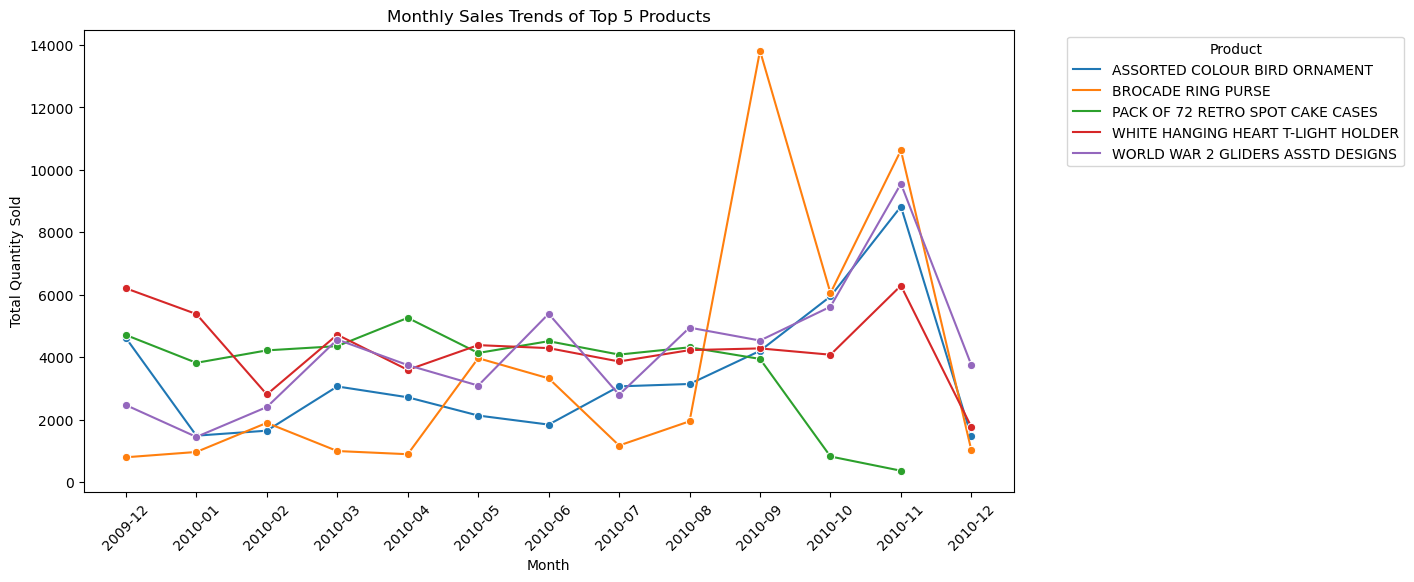

In [51]:
plt_top5(get_top_sellers(df1))

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


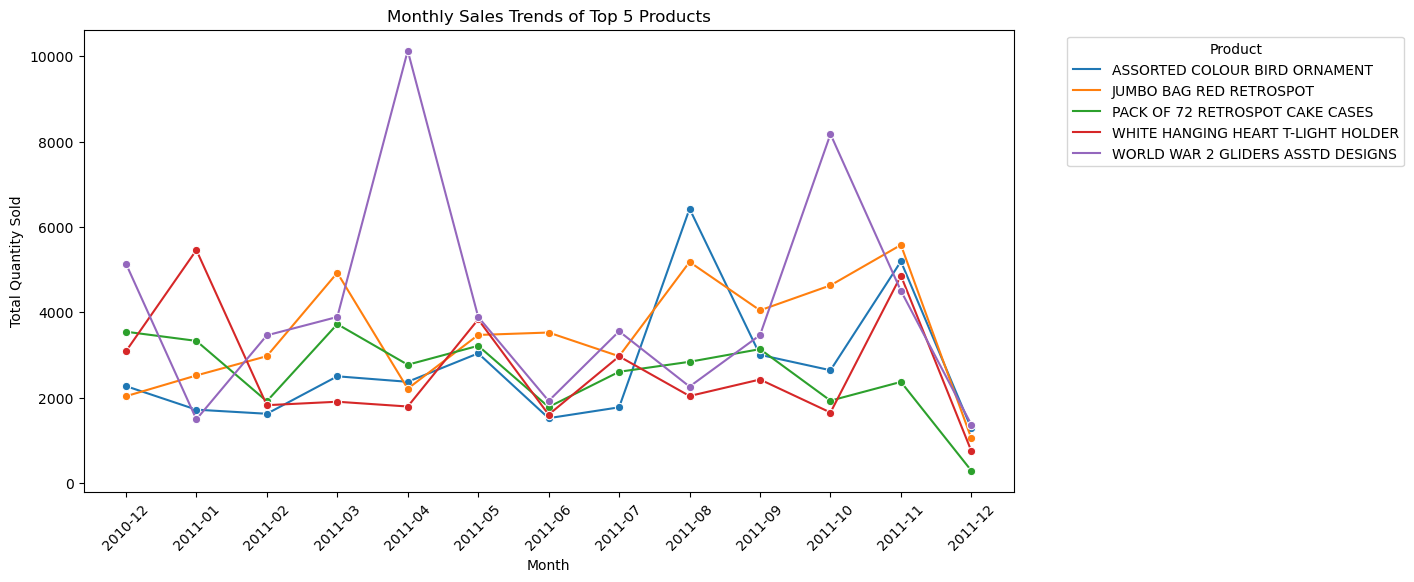

In [38]:
plt_top5(get_top_sellers(df2))

In [ ]:
#predictive analysis

In [39]:
df2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,YearMonth,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12,14.85


In [39]:
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,YearMonth,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,30.00
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,7.50


In [40]:
df_comb = pd.concat([df1,df2])

In [41]:
df_comb.sort_values(by = ['YearMonth'])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,YearMonth,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,83.40
27379,491698,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,24,2009-12-13 13:31:00,0.65,12681.0,France,2009-12,15.60
27378,491698,22090,PAPER BUNTING RETRO SPOTS,6,2009-12-13 13:31:00,2.95,12681.0,France,2009-12,17.70
27377,491698,22181,SNOWSTORM PHOTO FRAME FRIDGE MAGNET,12,2009-12-13 13:31:00,0.85,12681.0,France,2009-12,10.20
27376,491698,21137,BLACK RECORD COVER FRAME,4,2009-12-13 13:31:00,3.75,12681.0,France,2009-12,15.00
...,...,...,...,...,...,...,...,...,...,...
523888,580523,23351,ROLL WRAP 50'S CHRISTMAS,4,2011-12-04 15:00:00,1.25,17827.0,United Kingdom,2011-12,5.00
523887,580523,23350,ROLL WRAP VINTAGE SPOT,2,2011-12-04 15:00:00,1.25,17827.0,United Kingdom,2011-12,2.50
523886,580523,20679,EDWARDIAN PARASOL RED,3,2011-12-04 15:00:00,5.95,17827.0,United Kingdom,2011-12,17.85
523892,580523,22075,6 RIBBONS ELEGANT CHRISTMAS,3,2011-12-04 15:00:00,0.39,17827.0,United Kingdom,2011-12,1.17


In [23]:
total_sales = df_comb.groupby(['Description','YearMonth'])['Quantity'].sum()

In [124]:
total_sales

Description                          YearMonth
  DOORMAT UNION JACK GUNS AND ROSES  2010-01      150
                                     2010-02        5
                                     2010-03       14
 3 STRIPEY MICE FELTCRAFT            2009-12      261
                                     2010-01       64
                                                 ... 
ZINC WIRE SWEETHEART LETTER TRAY     2011-08        1
                                     2011-09        2
                                     2011-10        8
                                     2011-11        9
                                     2011-12       13
Name: Quantity, Length: 61768, dtype: int64

In [24]:
top_5_sales = total_sales.nlargest(5)

In [25]:
top_5_sales

Description                         YearMonth
BLACK AND WHITE PAISLEY FLOWER MUG  2010-02      19248
BROCADE RING PURSE                  2010-09      13817
SET/6 WOODLAND PAPER PLATES         2010-03      13099
SET/6 WOODLAND PAPER CUPS           2010-03      13062
SET/6 STRAWBERRY PAPER CUPS         2010-03      12913
Name: Quantity, dtype: int64

In [107]:
arima_model = auto_arima(product_series, seasonal=True, m=12, trace=False, suppress_warnings=True)
model_fit = sm.tsa.ARIMA(product_series, order=arima_model.order).fit()

ValueError: zero-size array to reduction operation maximum which has no identity

In [84]:
arima_model = auto_arima(list(product_series), seasonal=True, m=12, trace=False, suppress_warnings=True)

ValueError: zero-size array to reduction operation maximum which has no identity

In [51]:
df1['Customer ID']

0         13085.0
1         13085.0
2         13085.0
3         13085.0
4         13085.0
           ...   
525456    17530.0
525457    17530.0
525458    17530.0
525459    17530.0
525460    17530.0
Name: Customer ID, Length: 416681, dtype: float64

In [96]:
product_series

YearMonth
2009-12    4613
2010-01    1483
2010-02    1643
2010-03    3060
2010-04    2713
2010-05    2128
2010-06    1838
2010-07    3063
2010-08    3139
2010-09    4201
2010-10    5946
2010-11    8825
2010-12    1468
Freq: M, Name: ASSORTED COLOUR BIRD ORNAMENT, dtype: int64

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


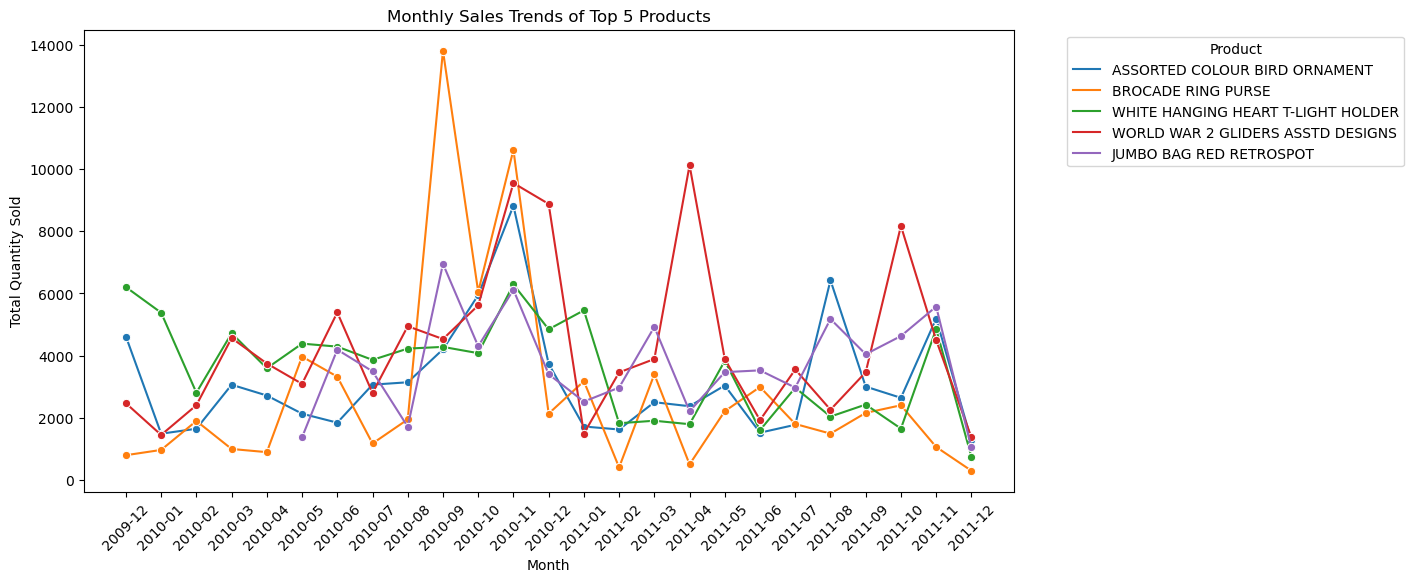

In [133]:
plt_top5(get_top_sellers(df_comb))

In [42]:
df_assorted_colour = df_comb[df_comb['Description'].str.contains('assorted colour bird ornament', case = False, regex=True) == True]

In [57]:
df_assorted_colour['YearMonth'].dtype

period[M]

In [44]:
df_brocade = df_comb[df_comb['Description'].str.contains('brocade ring purse', case = False, regex=True) == True]

In [45]:
df_hanging = df_comb[df_comb['Description'].str.contains('white hanging heart t-light holder', case = False, regex=True) == True]

In [46]:
df_ww = df_comb[df_comb['Description'].str.contains('world war 2 gliders', case = False, regex=True) == True]

In [47]:
df_jumbo = df_comb[df_comb['Description'].str.contains('jumbo bag red retrospot', case = False, regex=True) == True]

In [73]:
def create_arima(arima_df):
   #groupby to make it sales by date
   grouped_df = arima_df.groupby('YearMonth')['Sales'].sum()
   grouped_df.index = grouped_df.index.to_timestamp()
   
   model = ARIMA(grouped_df, order=(1, 0, 1))
   model_fit = model.fit()
   forecast = model_fit.get_forecast(steps=30)
   # Split the data into train and test
   train_size = int(len(grouped_df) * 0.8)
   train, test = grouped_df[0:train_size], grouped_df[train_size:len(grouped_df)]
   # Fit the ARIMA model on the training dataset
   model_train = ARIMA(grouped_df, order=(1, 0, 1))
   model_train_fit = model_train.fit()
   # Forecast on the test dataset
   test_forecast = model_train_fit.get_forecast(steps=len(test))
   forecast_index = pd.date_range(start=train.index[-1] + pd.DateOffset(months=1), periods=len(test), freq='MS')
   test_forecast_series = pd.Series(test_forecast.predicted_mean.values, index=forecast_index)

   # Create a plot to compare the forecast with the actual test data
   plt.figure(figsize=(14,7))
   plt.plot(train, label='Training Data')
   plt.plot(test, label='Actual Data', color='orange')
   plt.plot(test_forecast_series, label='Forecasted Data', color='green')
   plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
   plt.title('ARIMA Model Evaluation')
   plt.xlabel('Date')
   plt.ylabel('Sales')
   plt.legend()
   plt.show()



   return test_forecast, plt.show()

In [53]:
df_assorted_colour

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,YearMonth,Sales
15,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom,2009-12,27.04
282,489465,84879,ASSORTED COLOUR BIRD ORNAMENT,160,2009-12-01 10:52:00,1.45,13767.0,United Kingdom,2009-12,232.00
557,489522,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2009-12-01 11:45:00,1.69,15998.0,United Kingdom,2009-12,13.52
575,489523,84879,ASSORTED COLOUR BIRD ORNAMENT,800,2009-12-01 11:46:00,1.45,12931.0,United Kingdom,2009-12,1160.00
938,489539,84879,ASSORTED COLOUR BIRD ORNAMENT,96,2009-12-01 12:18:00,1.69,15061.0,United Kingdom,2009-12,162.24
...,...,...,...,...,...,...,...,...,...,...
534044,581129,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2011-12-07 12:48:00,1.69,15498.0,United Kingdom,2011-12,13.52
534081,581132,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2011-12-07 12:55:00,1.69,17590.0,United Kingdom,2011-12,13.52
534782,581170,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2011-12-07 15:00:00,1.69,13767.0,United Kingdom,2011-12,54.08
538389,581405,84879,ASSORTED COLOUR BIRD ORNAMENT,3,2011-12-08 13:50:00,1.69,13521.0,United Kingdom,2011-12,5.07


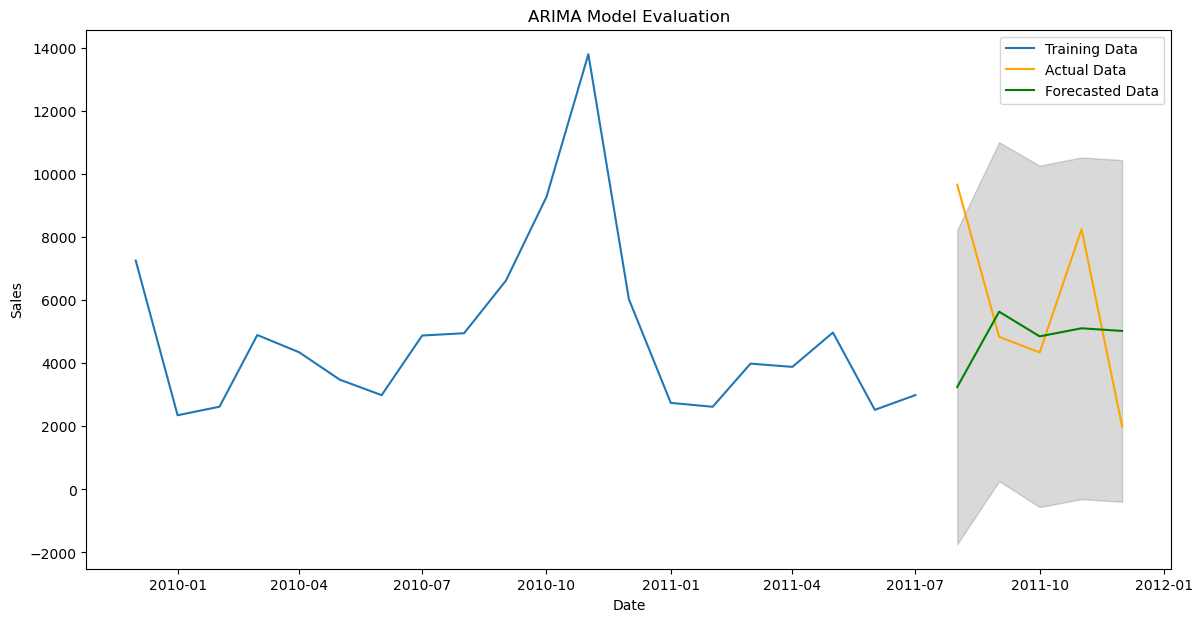

(<statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper at 0x28ea9259610>,
 None)

In [74]:
create_arima(df_assorted_colour)

In [194]:
df_test = df_assorted_colour.groupby('InvoiceDate')['Sales'].sum()

InvoiceDate
2009-12-01 09:06:00     27.04
2009-12-01 11:45:00     13.52
2009-12-01 12:18:00    162.24
2009-12-01 13:49:00     27.04
2009-12-01 14:40:00     81.12
                        ...  
2011-12-06 16:41:00     13.52
2011-12-07 09:35:00     40.56
2011-12-07 11:43:00     13.52
2011-12-07 12:55:00     13.52
2011-12-08 13:50:00      5.07
Name: Sales, Length: 1325, dtype: float64